# Evaluating Regression Model (Complete Walkthrough)

# Sample Scenario

### My students have just completed the first exam in the spring semester literature class. I want to know if there is anyone I should be concerned about at this point so that we can get ahead of a problem before it forms.

### I have the data from last semester's class. Neither the content nor the exams have changed in any way, so I'm hoping I can use that data to find the line that most closely predicts final grades. Once I find the "Line of Best Fit" or the "Regression Line", I can use the equation to calculate the current students' final grades using their first exam grades.

#### There are 3 questions we need to answer:

##### How do we know if our model is good enough?
##### How do we find the line of best fit?
##### How do we evaluate our model?
##### Are our features valuable?

## Get sample data

In [65]:
import pandas as pd
import numpy as np

# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)


,x,y
0,100,96
1,93,90
2,84,89


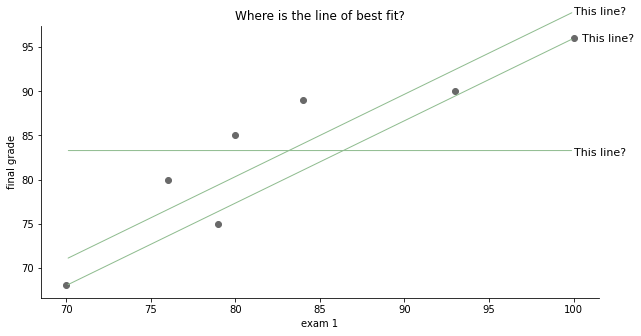

In [2]:
import viz
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("axes.spines", top=False, right=False)
viz.evaluation_example1(df, x, y)


### Baseline (The very basic baseline is one that uses no model at all)


### baseline predictions:  ^y = μy

##### __NOTE:__ ^y is the 'yhat' == the mean of y

In [3]:
df['yhat_baseline']= df['y'].mean()
df.head()

,x,y,yhat_baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714


## Build Simple model

We want to find the regression line where exam 1 is the feature or single independent variable and final grade is our target or dependent variable. We have a labeled dataset, so this is supervised machine learning. In short, we are going to provide a regression algorithm with our labeled data (our x and y values) and get in return the parameters needed for the optimal regression line. The parameters needed in a simple regression problem is the y-intercept and the slope/coefficient.

X == exam 1

y == final exam

In [4]:
# Import the required lib

from sklearn.linear_model import LinearRegression

# generate parameters, i.e. create model
ols_model = LinearRegression()

# Fit the model
ols_model.fit(df[['x']], df.y)

# compute predictions and add to original dataframe
df['yhat_predicted'] = ols_model.predict(df[['x']])

df.head(3)


,x,y,yhat_baseline,yhat_predicted
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350


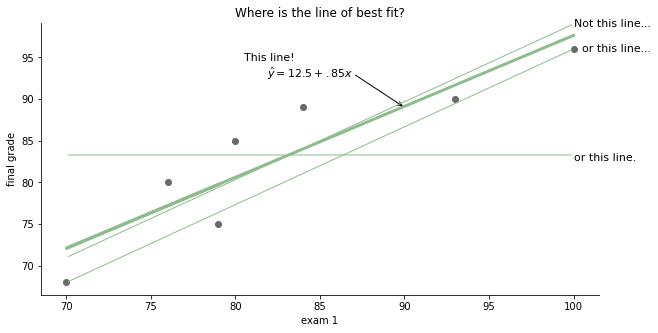

In [5]:
# viz model (prebuild module)
# The thick green line is our regression line. It passes through the values for exam1 (x) and the predicted values for final grade (^y)


viz.evaluation_example2(df, x, y)


## How could we determine which line is best, numerically? We will do that next.



# (A). Manual Approach
Manually Compute Evaluation Metrics.

In this lesson, we will manually compute two common evaluation metric for regression models, the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE). To do so, we take the following steps:

Compute the residual, or error, for each data point.
Compute the SSE, Sum of Squared Errors, a.k.a. RSS, Residual Sum of Squares. This is simply squaring each of the errors computed in step one and summing them all together.
Compute the MSE, Mean Squared Error. We arrive at this by dividing your SSE by the total number of data points, i.e. the average of your errors that have each been squared.
Compute the RMSE, Root Mean Squared Error. Simply take the square root of the MSE.
We will do this for both the predictions from the model and those from the baseline. We will then compare the final value of each. Whichever has the lower value is the better prediction.

>- ### Residual, error for each data point

>- ### SSE, Sum of Squared Errors (RSS, Residual Sum of Squares)



>- ### MSE, Mean Squared Error

>- ### RMSE, Root Mean Squared Error



In [6]:
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### The residual of an observed value is the difference between the observed value and the estimated value. Another way to state this is that it is the vertical distance from the original data point to the expected data point (which shares an x and sits on the regression line). In this exammple, the residual of an observation is the difference between that students actual final grade and the expected final grade.


>- ### __Residuals: for each data point, (^y−y)__



In [7]:
# compute residuals
df['residual'] = df['yhat_predicted'] - df['y']

df['residual_baseline'] = df['yhat_baseline'] - df['y']


In [8]:
df.head()

,x,y,yhat_baseline,yhat_predicted,residual,residual_baseline
0,100,96,83.285714,97.635214,1.635214,-12.714286
1,93,90,83.285714,91.676524,1.676524,-6.714286
2,84,89,83.285714,84.015350,-4.984650,-5.714286
3,80,85,83.285714,80.610384,-4.389616,-1.714286
4,76,80,83.285714,77.205418,-2.794582,3.285714


# Visualize baseline residuals

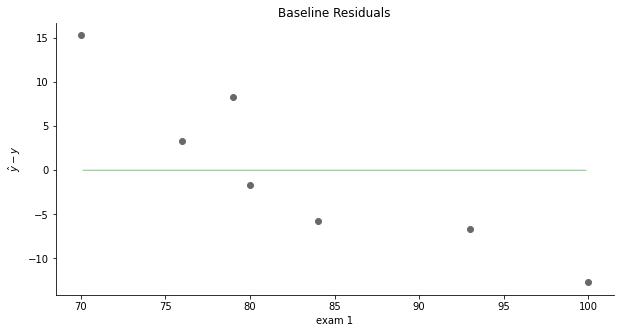

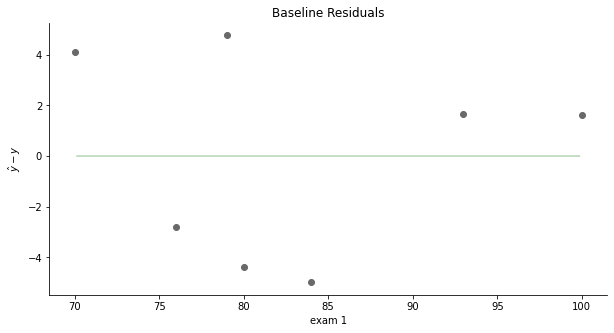

In [9]:
viz.evaluation_example5(df, x, df.residual_baseline)

viz.evaluation_example5(df, x, df.residual)


>- ## SSE, Sum of Squared Errors / RSS, Residual Sum of Squares


The value of the SSE is derived by simply squaring each of the errors computed in step one and summing them all together.


In [10]:
# square each residual value
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)


,x,y,yhat_baseline,yhat_predicted,residual,residual_baseline,residual^2,residual_baseline^2
0,100,96,83.285714,97.635214,1.635214,-12.714286,2.673926,161.653061
1,93,90,83.285714,91.676524,1.676524,-6.714286,2.810732,45.081633
2,84,89,83.285714,84.015350,-4.984650,-5.714286,24.846737,32.653061


In [20]:
# ...After squaring, compute the SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE predicted model = ", SSE)
print("SSE residual baseline = ", SSE_baseline)


SSE predicted model =  96.85259593679456
SSE residual baseline =  555.4285714285714


### SSE Explanationm

At second glance (after visualizing the residual plot), it appears the model is performing better than the baseline. However, it could be do to a single outlier that drastically has increased the SSE. (Well, we know it's not becuase we plotted the residuals, but if we hadn't, that could be the case.)

>- ## MSE, Mean Squared Error



Next, we can use the SSE to compute the Mean Squared Error, MSE. We arrive at this by dividing your SSE by the total number of data points, i.e. the average of your errors that have each been squared. If outliers don't matter as much, but cost exponential instead of linear, then this is a good metric to use. That means that a residual of 10 (the expected value is 10 units off the actual value) is greater than twice a residual of 5.




In [18]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE predicted model = ", MSE)
print("MSE baseline = ", MSE_baseline)


MSE predicted model =  13.836085133827794
MSE baseline =  79.34693877551021


### MSE Explanation

It is clear the model is performing better than the baseline.

>- ## RMSE, Root Mean Squared Error

Now, we can use the MSE to compute the Root Mean Squared Error, RMSE. Simply take the square root of the MSE. If you want to see the error in the actual units of the y variable, then this is a good metric to use. In this case, the units will be grade points.

In [22]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE predicted model = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)


RMSE predicted model =  3.719688849060872
RMSE baseline =  8.907689867497083


### RMSE Explanation 

We can see that the model is off by an average of 3.7 grade points, while the baseline is off by an average of 8.9 grade points. The model does better than having no model at all.



# (B). Scikit Learn Approach

### Computing the SSE

To compute the SSE or RSS, we must use the mean_squared_error function, as sklearn.metrics does not have a function for SSE directly. All we need to do is multiply the MSE by n, the number of data points.

In [26]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df.y, df.yhat_predicted)*len(df)

SSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)*len(df)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print()
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 


SSE manual == SSE sklearn:  True

SSE manual - baseline == SSE sklearn - baseline:  True


### Computing the MSE


In [28]:
MSE2 = mean_squared_error(df.y, df.yhat_predicted)

MSE2_baseline = mean_squared_error(df.y, df.yhat_baseline)


print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 


MSE manual == MSE sklearn:  True
MSE manual - baseline == MSE sklearn - baseline:  True


### Computing the RMSE


In [29]:
RMSE2 = sqrt(mean_squared_error(df.y, df.yhat_predicted))
RMSE2_baseline = sqrt(mean_squared_error(df.y, df.yhat_baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 


RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  True


In [33]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print()
print(df_baseline_eval)


  metric  model_error
0    SSE    96.852596
1    MSE    13.836085
2   RMSE     3.719689

          metric  model_error
0   SSE_baseline   555.428571
1   MSE_baseline    79.346939
2  RMSE_baseline     8.907690


In [35]:
df.head(3)

,x,y,yhat_baseline,yhat_predicted,residual,residual_baseline,residual^2,residual_baseline^2
0,100,96,83.285714,97.635214,1.635214,-12.714286,2.673926,161.653061
1,93,90,83.285714,91.676524,1.676524,-6.714286,2.810732,45.081633
2,84,89,83.285714,84.015350,-4.984650,-5.714286,24.846737,32.653061


## Draw Conclusions

In [32]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval


,metric,model_error,error_delta
0,SSE,96.852596,-458.575975
1,MSE,13.836085,-65.510854
2,RMSE,3.719689,-5.188001


# Evaluate Model Significance

R^2 tells you how well your model fits the data by measuring the strength of the relationship between your model and the dependent variable. However, it is not a formal test for the relationship. The F-test of overall significance is the hypothesis test for this relationship. It indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables.

If the overall F-test is significant (evident through the p-value of the F statistic), you can conclude that 
R^2 does not equal zero, and the correlation between the model and dependent variable is statistically significant.

>- ### R^2 is the ratio of the explained sum of squares (ESS) to the total sum of squares (TSS). When turned into a percentage, R^2 x 100, it represents the percent of variance in y (target) explained by x (feature).



>- ## ESS explained sum of squares 
The sum of the difference between the each predicted value (predicted final grade, in this example) and the mean of all actual values (again, final grades).



>- ## TSS total sum of squares
The sum of difference between the actual final grade and the mean of all final grades. It can also be derived by summing the ESS and SSE.

# R^2 = (ESS / TSS )

>- ### NOTE: R^2 is R-squared

## Compute EES

In [40]:
# compute explained sum of squares
ESS = sum((df.yhat_predicted - df.y.mean())**2)
ESS

458.57597549177694

In [41]:
SSE = df_eval[df_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])


ESS =  458.57597549177694
SSE =  96.85259593679456
TSS =  555.4285714285716


## Compare the models side by side

## A). Manually Computed

In [42]:
# add the ESS, SSE, TSS from the model to a dataframe
ss = pd.DataFrame(np.array(['SSE','ESS','TSS']), columns=['metric'])
ss['model_values'] = np.array([SSE[0], ESS, TSS[0]])

# compute and add the baseline values to the dataframe
ESS_baseline = sum((df.yhat_baseline - df.y.mean())**2)
SSE_baseline = df_baseline_eval[df_baseline_eval.metric=='SSE_baseline']['model_error'][0]
TSS_baseline = ESS_baseline + SSE_baseline


In [43]:
ss['model_values'] = np.array([SSE_baseline, ESS_baseline, TSS_baseline])

ss


,metric,model_values
0,SSE,555.428571
1,ESS,0.000000
2,TSS,555.428571


## R-Squared

In [44]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")


R-squared =  0    0.826
Name: model_error, dtype: float64
Percent of variance in y explained by x =  0    82.6
Name: model_error, dtype: float64 %


## B). Using Scikit-Learn

In [46]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.y, df.yhat_predicted)
print('Explained Variance = ', round(evs,3)*100)


Explained Variance =  82.6
